<a href="https://colab.research.google.com/github/aicharya/Motor_Vehicle_Collisions/blob/main/MotorVehicleCollisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import plotly.express as px

In [3]:
columnDataTypes = { 'BOROUGH' : 'str', 'ZIP CODE' : 'str', 'ON STREET NAME' : 'str', 'CROSS STREET NAME' : 'str', 'OFF STREET NAME' : 'str',
                    'VEHICLE TYPE CODE 1' : 'str', 'VEHICLE TYPE CODE 2' : 'str', 'VEHICLE TYPE CODE 3' : 'str' , 
                    'VEHICLE TYPE CODE 4' : 'str', 'VEHICLE TYPE CODE 5' : 'str',
                    'CONTRIBUTING FACTOR VEHICLE 1' : 'str',  'CONTRIBUTING FACTOR VEHICLE 2' : 'str', 'CONTRIBUTING FACTOR VEHICLE 3' : 'str',
                    'CONTRIBUTING FACTOR VEHICLE 4' : 'str', 'CONTRIBUTING FACTOR VEHICLE 5' : 'str' ,}

In [9]:
columnDataTypes = { 'ZIP CODE' : 'str', }
df = pd.read_csv('https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD', dtype = columnDataTypes, parse_dates = [[0, 1]], infer_datetime_format = True)

In [10]:
for column in df.columns:
  print(column, " - ", pd.api.types.infer_dtype(df[column]))

CRASH DATE_CRASH TIME  -  datetime64
BOROUGH  -  string
ZIP CODE  -  string
LATITUDE  -  floating
LONGITUDE  -  floating
LOCATION  -  string
ON STREET NAME  -  string
CROSS STREET NAME  -  string
OFF STREET NAME  -  string
NUMBER OF PERSONS INJURED  -  floating
NUMBER OF PERSONS KILLED  -  floating
NUMBER OF PEDESTRIANS INJURED  -  integer
NUMBER OF PEDESTRIANS KILLED  -  integer
NUMBER OF CYCLIST INJURED  -  integer
NUMBER OF CYCLIST KILLED  -  integer
NUMBER OF MOTORIST INJURED  -  integer
NUMBER OF MOTORIST KILLED  -  integer
CONTRIBUTING FACTOR VEHICLE 1  -  string
CONTRIBUTING FACTOR VEHICLE 2  -  string
CONTRIBUTING FACTOR VEHICLE 3  -  string
CONTRIBUTING FACTOR VEHICLE 4  -  string
CONTRIBUTING FACTOR VEHICLE 5  -  string
COLLISION_ID  -  integer
VEHICLE TYPE CODE 1  -  string
VEHICLE TYPE CODE 2  -  string
VEHICLE TYPE CODE 3  -  string
VEHICLE TYPE CODE 4  -  string
VEHICLE TYPE CODE 5  -  string


In [11]:
df.head()

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [23]:
df.columns

Index(['CRASH DATE_CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

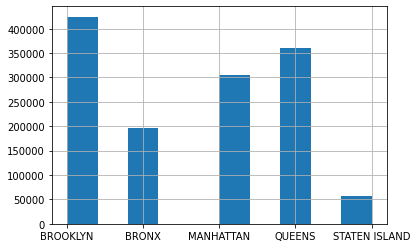

In [7]:
df.BOROUGH.hist()

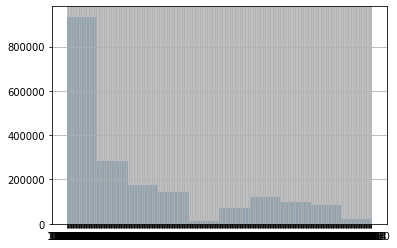

In [12]:
df['ZIP CODE'] = df['ZIP CODE'].apply(lambda x : str(x))
df['ZIP CODE'].hist()

In [15]:
df['VEHICLE TYPE CODE 1'].value_counts()

Sedan                                  518016
PASSENGER VEHICLE                      416206
Station Wagon/Sport Utility Vehicle    409223
SPORT UTILITY / STATION WAGON          180291
Taxi                                    48146
                                        ...  
SUBN WHI                                    1
E bike                                      1
FDNY Fire                                   1
CARGO VAN                                   1
E BIKE                                      1
Name: VEHICLE TYPE CODE 1, Length: 1449, dtype: int64

In [16]:
df.notna().sum()

CRASH DATE                       1947735
CRASH TIME                       1947735
BOROUGH                          1342942
ZIP CODE                         1947735
LATITUDE                         1723459
LONGITUDE                        1723459
LOCATION                         1723459
ON STREET NAME                   1542359
CROSS STREET NAME                1229033
OFF STREET NAME                   313005
NUMBER OF PERSONS INJURED        1947717
NUMBER OF PERSONS KILLED         1947704
NUMBER OF PEDESTRIANS INJURED    1947735
NUMBER OF PEDESTRIANS KILLED     1947735
NUMBER OF CYCLIST INJURED        1947735
NUMBER OF CYCLIST KILLED         1947735
NUMBER OF MOTORIST INJURED       1947735
NUMBER OF MOTORIST KILLED        1947735
CONTRIBUTING FACTOR VEHICLE 1    1941832
CONTRIBUTING FACTOR VEHICLE 2    1656251
CONTRIBUTING FACTOR VEHICLE 3     136496
CONTRIBUTING FACTOR VEHICLE 4      30344
CONTRIBUTING FACTOR VEHICLE 5       8134
COLLISION_ID                     1947735
VEHICLE TYPE COD

In [28]:
df.dtypes

CRASH DATE_CRASH TIME            datetime64[ns]
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3            object
CONTRIBUTING FACTOR VEHICLE 4           

In [20]:
df['CONTRIBUTING FACTOR VEHICLE 1']

0           Aggressive Driving/Road Rage
1                      Pavement Slippery
2                  Following Too Closely
3                            Unspecified
4                                    NaN
                       ...              
1948478               Turning Improperly
1948479    Failure to Yield Right-of-Way
1948480    Failure to Yield Right-of-Way
1948481               Turning Improperly
1948482    Failure to Yield Right-of-Way
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 1948483, dtype: object